In [1]:
#Cargamos la data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

data = pd.read_csv("data.csv", header=0)
data.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Realizaremos un análisis exploratorio de los tipos de datos del dataset

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


## Resultados

El dataset contiene 6 columnas. Las columnas son las siguientes:
- pelvic_incidence
- pelvic_tilt numeric
- lumbar_lordosis_angle
- sacral_slope
- pelvic_radius
- degree_spondlylolisthesis
- class

Con base en el análisis exploratorio de los tipos de datos del dataset, infermimos que se trata de datos referentes a la columna vertebral. La columna class es la columna objetivo, la cual contiene dos clases: `Normal` y `Abnormal`. Esta columna indica si el paciente tiene una columna vertebral normal o anormal basandose en los valores de las otras columnas.

# Análisis de datos faltantes
En un set de datos, es posible que existan datos faltantes. Estos datos faltantes pueden ser representados por `NaN` o `None`. En este caso, vamos a analizar si existen datos faltantes en el dataset.

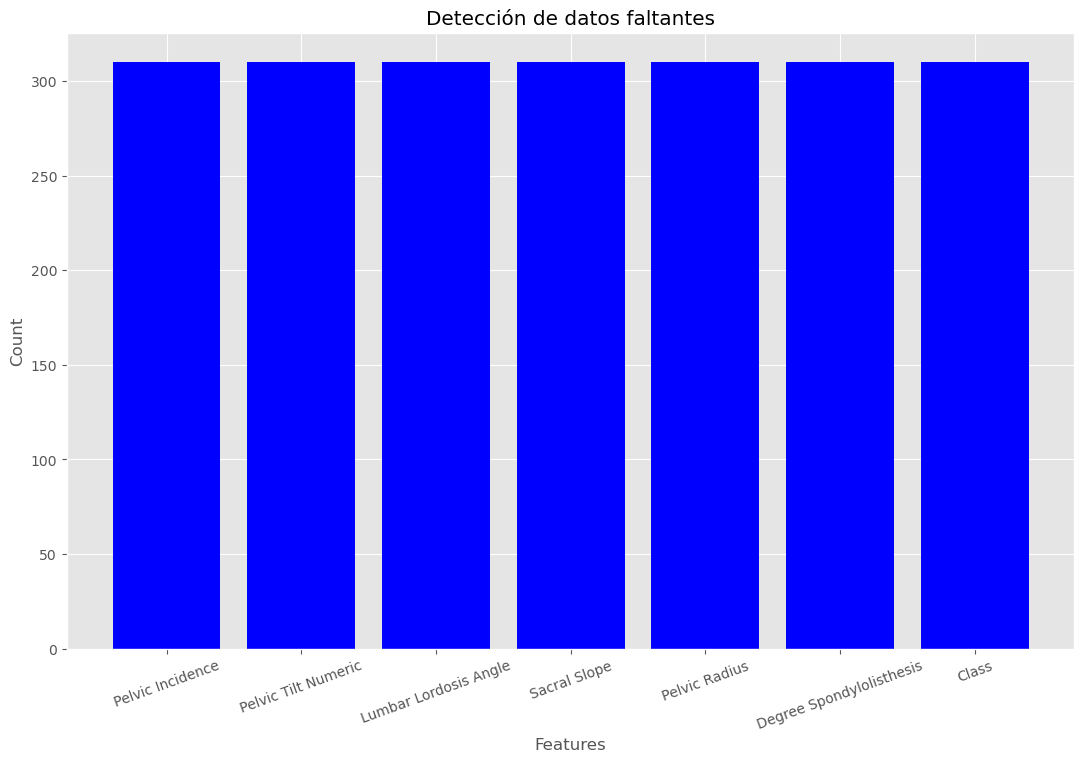

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(13,8))
plt.bar('Pelvic Incidence', data['pelvic_incidence'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Pelvic Tilt Numeric', data['pelvic_tilt numeric'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Lumbar Lordosis Angle', data['lumbar_lordosis_angle'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Sacral Slope', data['sacral_slope'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Pelvic Radius', data['pelvic_tilt numeric'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Degree Spondylolisthesis', data['degree_spondylolisthesis'].count(), color="blue", label="Pelvic Incidence")
plt.bar('Class', data['class'].count(), color="blue", label="Pelvic Incidence")
plt.xticks(rotation = 20)
plt.xlabel("Features")
plt.ylabel("Count")
plt.title("Detección de datos faltantes")
plt.show()

## Resultados

A través de la gráfica, podemos inferir que no existen datos faltantes en el dataset. Todas las columnas contienen la misma cantidad de datos, lo cual indica que no hay datos faltantes.

## Análisis estadístico
Vamos a realizar un análisis de las características de cada columna del dataset.
Extraeremos los valores:
- Count: Cantidad de datos en el dataset
- Mean: Promedio del valor
- Standard Deviation: Desviación estándar
- min: Valor mínimo
- 25%: Primer cuartil
- 50%: Segundo cuartil
- 75%: Tercer cuartil
- max: Valor máximo

In [4]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## Clasificacion de los pacientes

Mediremos la cantidad de pacientes en condiciones normales y anormales.

class
Abnormal    210
Normal      100
Name: count, dtype: int64


/tmp/ipykernel_1393414/3023081026.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




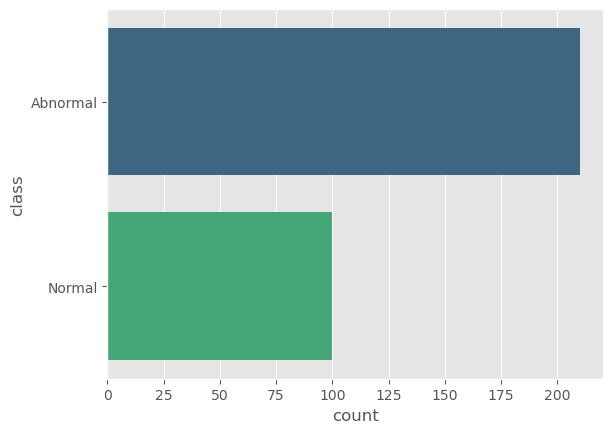

In [5]:
clases = pd.DataFrame(data["class"])
Normal = data[data["class"] == "Normal"]
Abnormal = data[data["class"] == "Abnormal"]

plt.style.use('ggplot')
sns.countplot(pd.DataFrame(data["class"]), palette="viridis", y='class', legend='reverse')
print(data["class"].value_counts())

## Analisis de relaciones entre las variables

Vamos a analizar la relación entre las variables del dataset. Este análisis nos permitirá identificar si existe alguna relación entre las variables que pueda influir en la clasificación de los pacientes.

Este diagrama muestra las caracteristicas de los pacientes. El Indice representa el número de paciente.

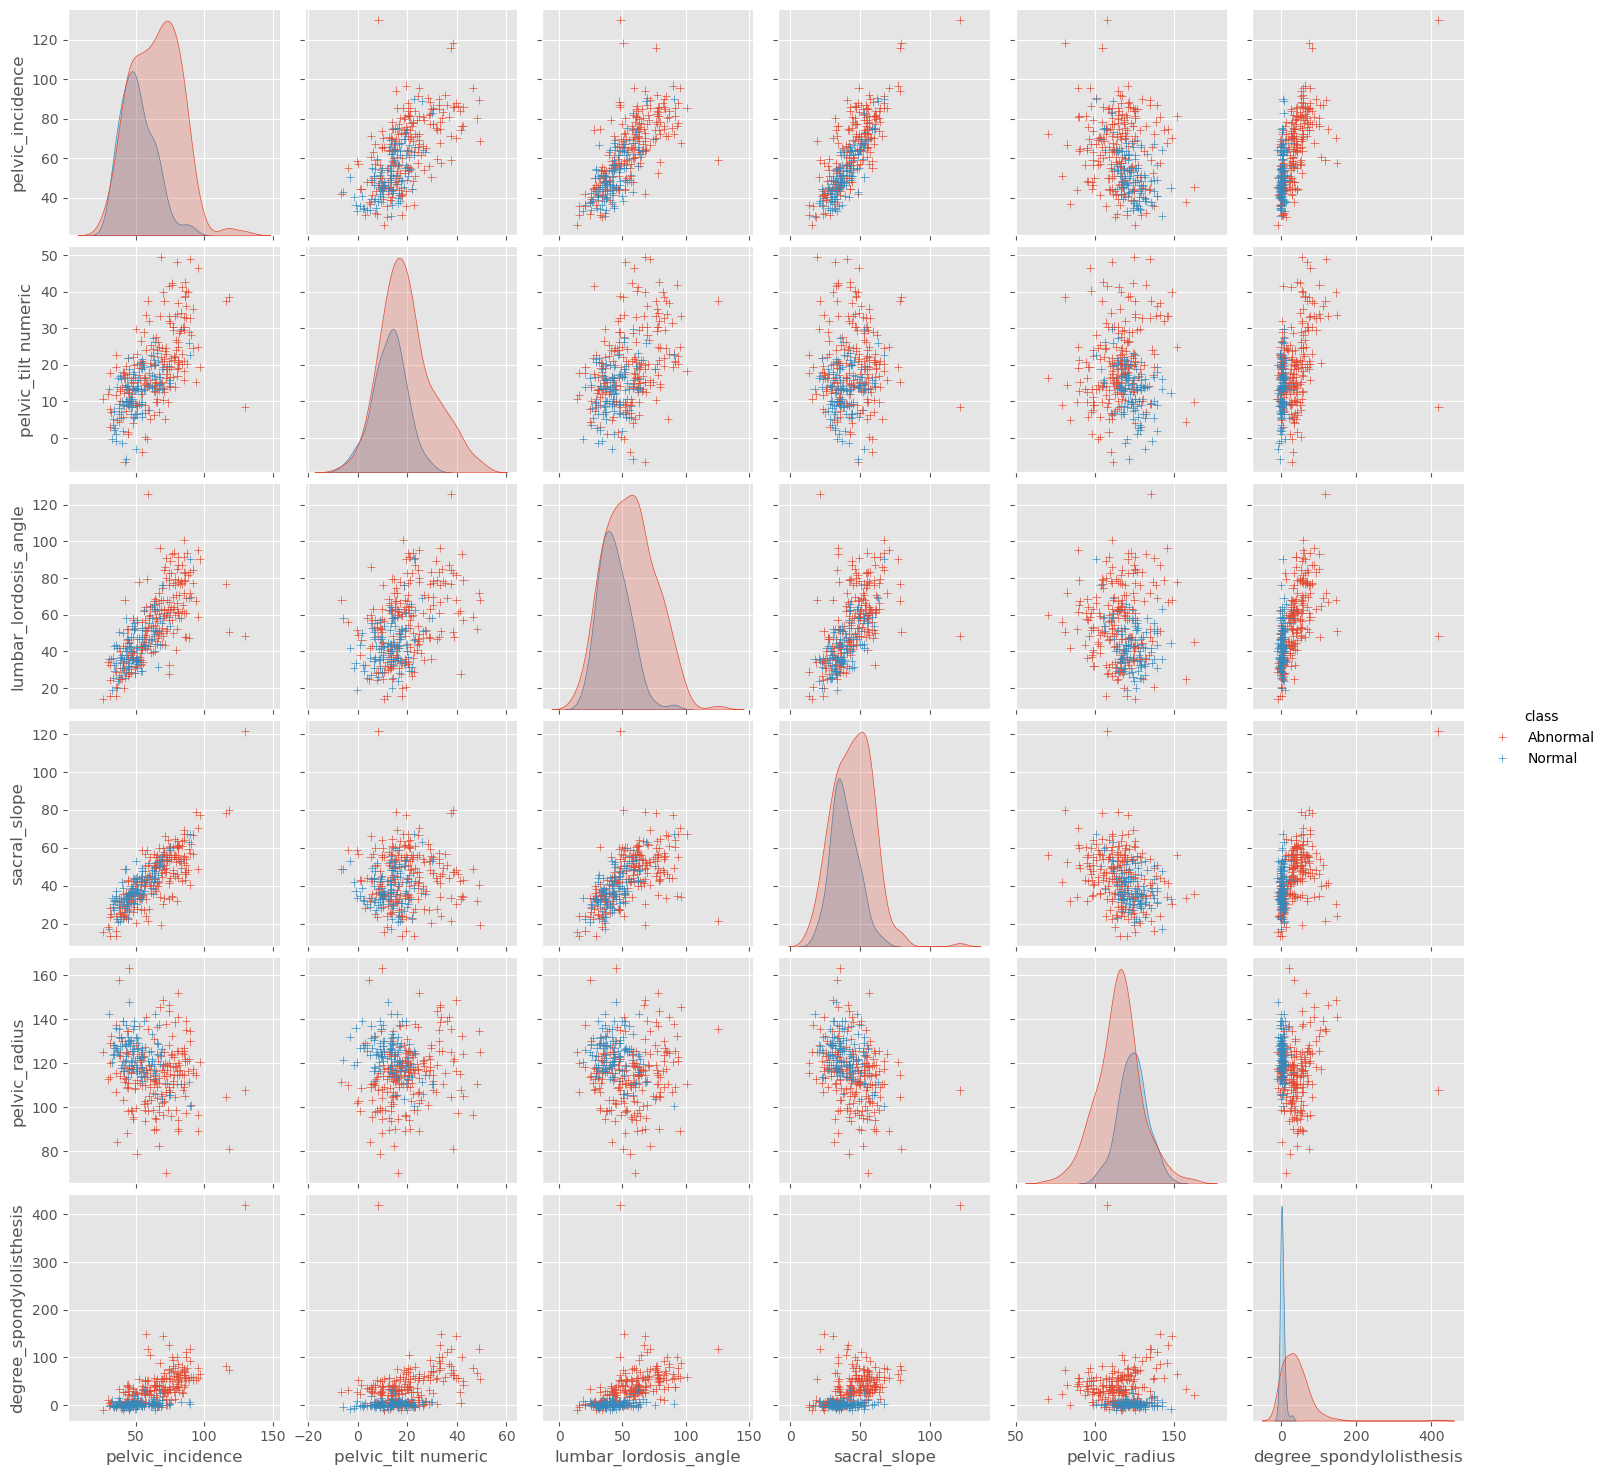

In [6]:
plt.style.use('ggplot')
sns.pairplot(data, hue="class", markers = "+")
plt.show()
desc = data.describe()

Otra forma de ver este mismo analisis es a traves de un swarmplot. Este tipo de gráfico nos permite ver la distribución de los datos de una manera más clara. ya que cada punto representa un dato y no se superponen.

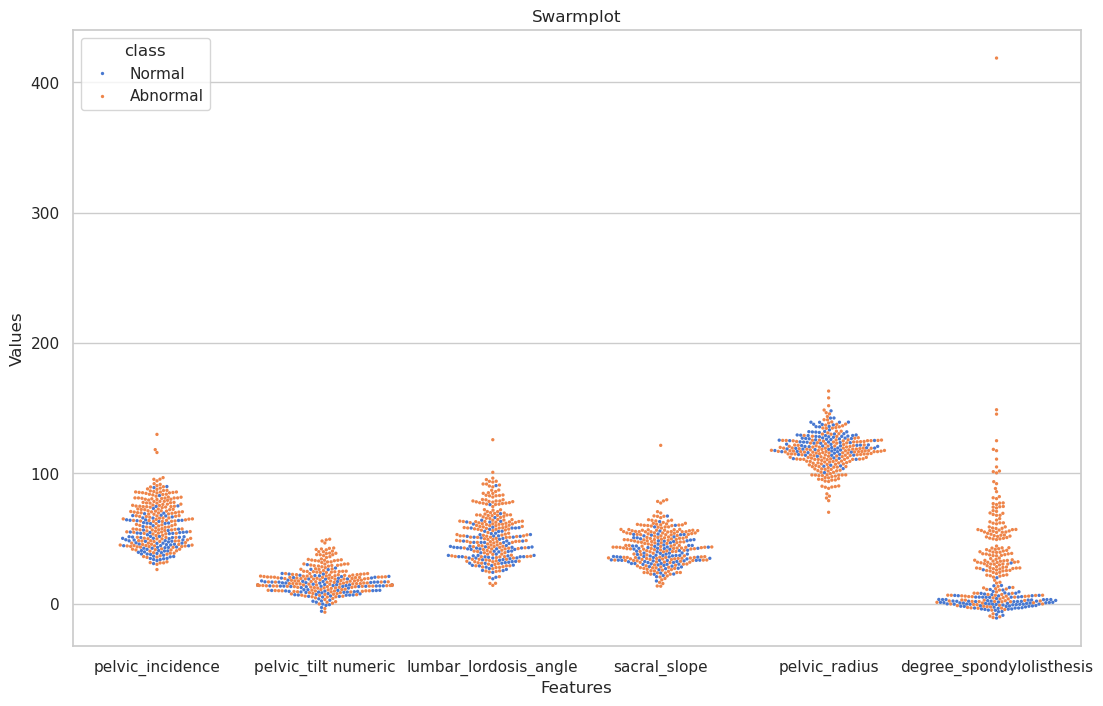

In [7]:
plt.style.use('ggplot')
sns.set(style="whitegrid", palette="muted")

data_swarm_plot = data.iloc[::-1]


data_swarm = pd.melt(data_swarm_plot, id_vars="class", var_name="Features", value_name='Values')
plt.figure(figsize=(13, 8))
sns.swarmplot(x="Features", y="Values", hue="class", data=data_swarm, s=2.4)
plt.title("Swarmplot")
plt.show()

# Simplifiquemos el análisis de las variables utilizando una tabla de correlación
Utilizaremos una mapa de calor que muestre, a través de una matriz, la correlación entre las variables del dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

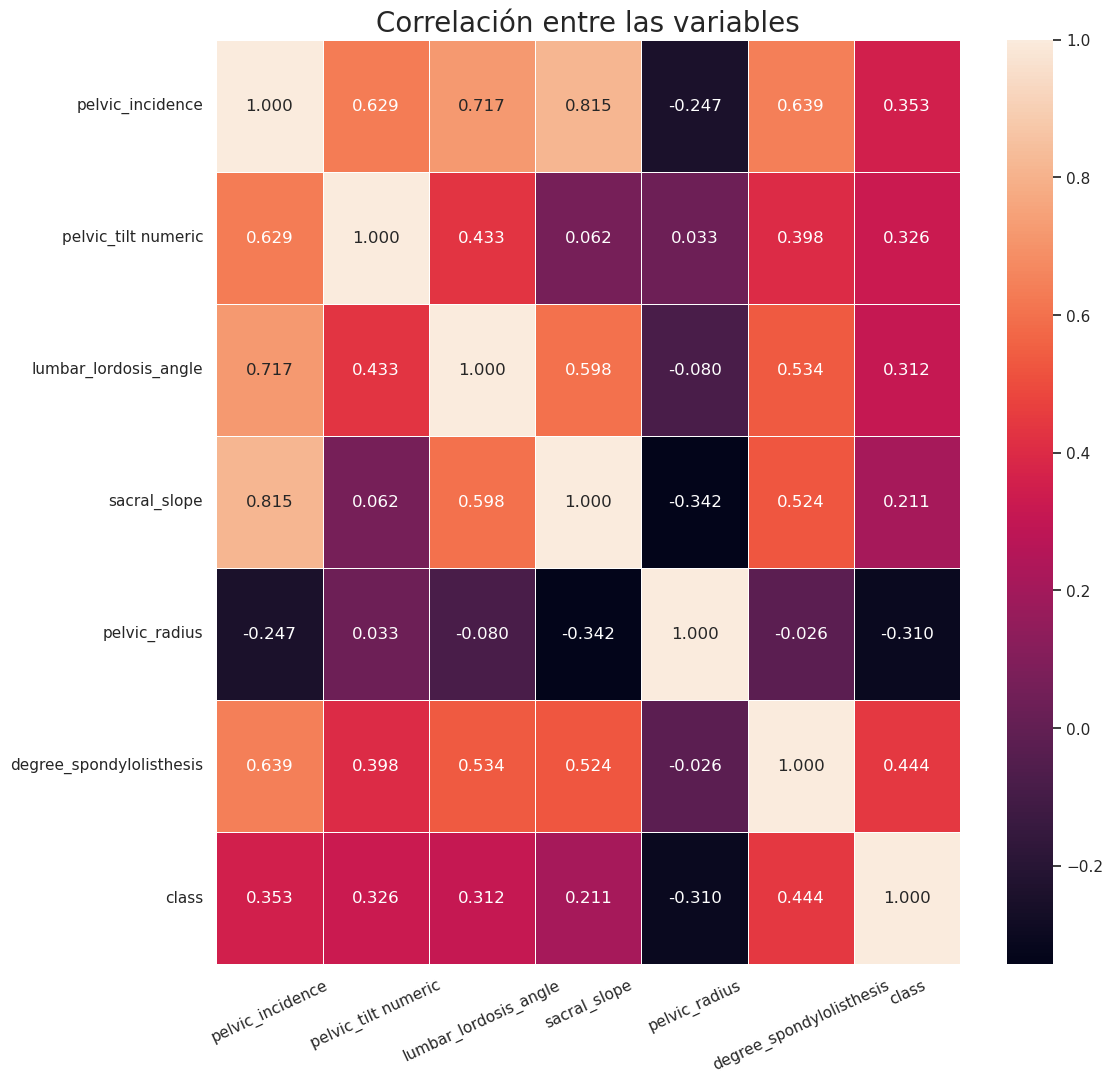

In [8]:
f, ax = plt.subplots(figsize=(12, 12))
normalized_data = pd.DataFrame(data)
normalized_data["class"] = data["class"].map({"Normal": 0, "Abnormal": 1})
sns.heatmap(normalized_data.corr(), annot=True, annot_kws= {"size": 12}, linewidths=0.5, fmt= ".3f", ax=ax)
plt.xticks(rotation=25)
plt.title("Correlación entre las variables", fontsize=20)
plt.show

## Analisis tridimensional

Vamos a realizar un análisis tridimensional de las variables del dataset. Este análisis nos permitirá visualizar la relación entre las variables en un espacio tridimensional.

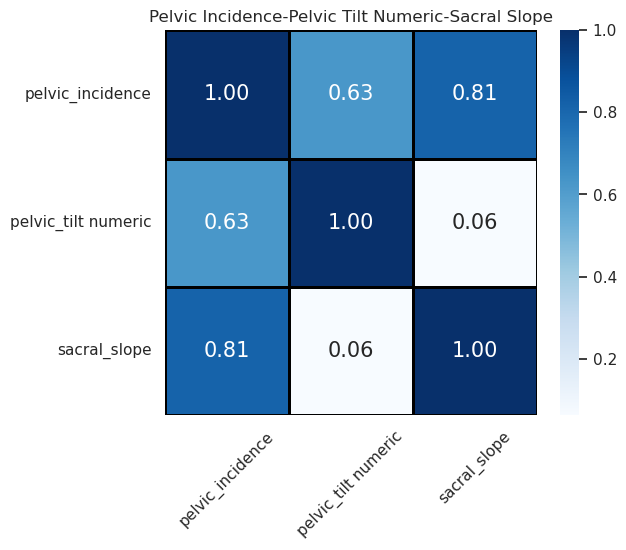

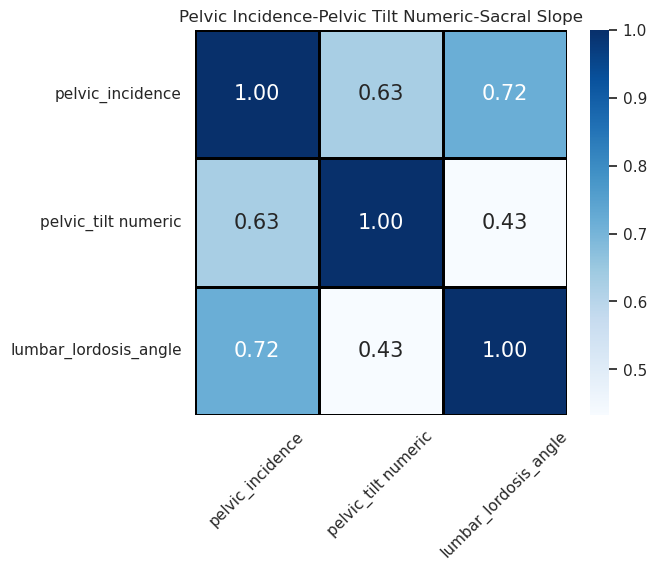

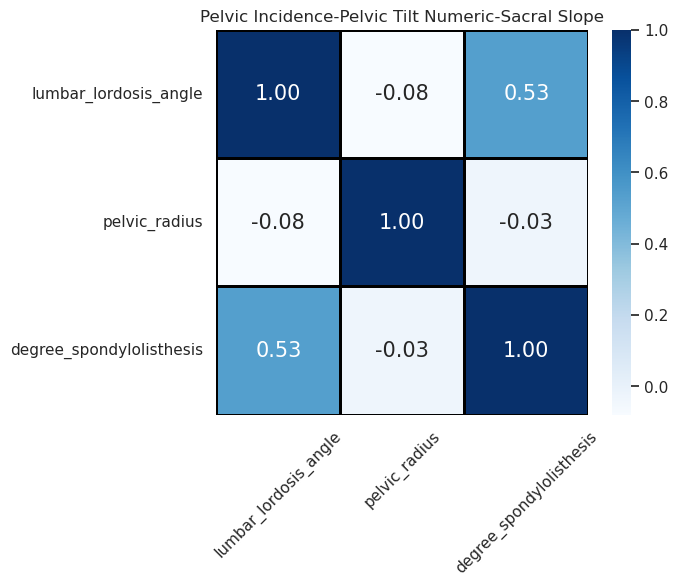

In [9]:
data1_pps = normalized_data.drop(["lumbar_lordosis_angle", "pelvic_radius", "degree_spondylolisthesis","class"], axis = 1)
data1_ppl = normalized_data.drop(["pelvic_radius","sacral_slope","degree_spondylolisthesis","class"], axis = 1)
data1_dlp =  normalized_data.drop(["sacral_slope","pelvic_tilt numeric","pelvic_incidence","class"], axis = 1)

# 3D scatterplot1
trace1 = go.Scatter3d(
                      x = Abnormal.pelvic_incidence,
                      y = Abnormal["pelvic_tilt numeric"],
                      z = Abnormal.sacral_slope,
                      mode = "markers",
                      name = "Abnormal",
                      marker = dict(
                           size = 4,
                           color = "rgb(255,100,100)"
                      )
)

trace2 = go.Scatter3d(
                      x = Normal.pelvic_incidence,
                      y = Normal["pelvic_tilt numeric"],
                      z = Normal.sacral_slope,
                      mode = "markers",
                      name = "Normal",
                      marker = dict(
                           size = 4,
                           color = "rgb(100,250,100)"
                      )
)
combine = [trace1,trace2]
layout = go.Layout(template = "plotly_white",
    scene = dict(
    xaxis =dict(
        title = "Pelvic Incidence"),
    yaxis =dict(
        title ="Pelvic Tilt Numeric"),
    zaxis =dict(
        title = "Sacral Slope"),),
    width = 800,
    margin = dict(l = 10,r = 10,b = 10,t = 10 )
    )
fig = go.Figure(data = combine, layout = layout)
iplot(fig)

#heatmap
f, ax = plt.subplots(figsize = (6,5))
sns.heatmap(data1_pps.corr(),annot = True,annot_kws = {"size": 15}, linewidths = 0.8,cmap ="Blues", linecolor = "black", fmt = ".2f",ax=ax).set(title = "Pelvic Incidence-Pelvic Tilt Numeric-Sacral Slope")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

# 3D scatterplot1
trace1 = go.Scatter3d(
                      x = Abnormal.pelvic_incidence,
                      y = Abnormal["pelvic_tilt numeric"],
                      z = Abnormal.lumbar_lordosis_angle,
                      mode = "markers",
                      name = "Abnormal",
                      marker = dict(
                           size = 4,
                           color = "rgb(255,100,100)"
                      )
)

trace2 = go.Scatter3d(
                      x = Normal.pelvic_incidence,
                      y = Normal["pelvic_tilt numeric"],
                      z = Normal.lumbar_lordosis_angle,
                      mode = "markers",
                      name = "Normal",
                      marker = dict(
                           size = 4,
                           color = "rgb(100,250,100)"
                      )
)
combine = [trace1,trace2]
layout = go.Layout(template = "plotly_white",
    scene = dict(
    xaxis =dict(
        title = "Pelvic Incidence"),
    yaxis =dict(
        title ="Pelvic Tilt Numeric"),
    zaxis =dict(
        title = "Sacral Slope"),),
    width = 800,
    margin = dict(l = 10,r = 10,b = 10,t = 10 )
    )
fig = go.Figure(data = combine, layout = layout)
iplot(fig)

#heatmap
f, ax = plt.subplots(figsize = (6,5))

sns.heatmap(data1_ppl.corr(),annot = True,annot_kws = {"size": 15}, linewidths = 0.8,cmap ="Blues", linecolor = "black", fmt = ".2f",ax=ax).set(title = "Pelvic Incidence-Pelvic Tilt Numeric-Sacral Slope")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

# 3D scatterplot1
trace1 = go.Scatter3d(
                      x = Abnormal.degree_spondylolisthesis,
                      y = Abnormal.lumbar_lordosis_angle,
                      z = Abnormal.pelvic_radius,
                      mode = "markers",
                      name = "Abnormal",
                      marker = dict(
                           size = 4,
                           color = "rgb(255,100,100)"
                      )
)

trace2 = go.Scatter3d(
                      x = Normal.degree_spondylolisthesis,
                      y = Normal.lumbar_lordosis_angle,
                      z = Normal.pelvic_radius,
                      mode = "markers",
                      name = "Normal",
                      marker = dict(
                           size = 4,
                           color = "rgb(100,250,100)"
                      )
)
combine = [trace1,trace2]
layout = go.Layout(template = "plotly_white",
    scene = dict(
    xaxis =dict(
        title = "Pelvic Incidence"),
    yaxis =dict(
        title ="Pelvic Tilt Numeric"),
    zaxis =dict(
        title = "Sacral Slope"),),
    width = 800,
    margin = dict(l = 10,r = 10,b = 10,t = 10 )
    )
fig = go.Figure(data = combine, layout = layout)
iplot(fig)

#heatmap
f, ax = plt.subplots(figsize = (6,5))

sns.heatmap(data1_dlp.corr(),annot = True,annot_kws = {"size": 15}, linewidths = 0.8,cmap ="Blues", linecolor = "black", fmt = ".2f",ax=ax).set(title = "Pelvic Incidence-Pelvic Tilt Numeric-Sacral Slope")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

## Método de clasificación mediante KNN (Nearest Neighbors) 

Ajustemos los datos y vamos a predecirlos mediante KNN.

In [10]:
# KNN https://scikit-learn.org/stable/modules/neighbors.html#classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
# print('Prediction: {}'.format(prediction))
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## Ajustemos el tren de datos y el conjunto de pruebas con KNN
* Entrenamiento: use el train ajustado
prueba: hacer predicción en el conjunto de prueba.
* Con el tren y los equipos de prueba, los datos ajustados y los datos probados son completamente diferentes
* train_test_split(x,y,test_size = 0.3,random_state = 1)
     * x: características
     * y: variables objetivo (normal, anormal)
     * test_size: porcentaje del tamaño de la prueba. Ejemplo test_size = 0,3, tamaño de prueba = 30% y tamaño del tren = 70%
     * random_state: establece una semilla. Si esta semilla es el mismo número, train_test_split() produce exactamente la misma división en cada momento
* fit(x_train,y_train): encaja en conjuntos de trenes
* puntuación (x_test, y_test)): predice y proporciona precisión en conjuntos de pruebas

In [11]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('Con KNN (K=3) la precisión es: ',knn.score(x_test,y_test)) # accuracy

Con KNN (K=3) la precisión es:  0.8602150537634409


## Evaluémos la mejor precisión del modelo con KNN

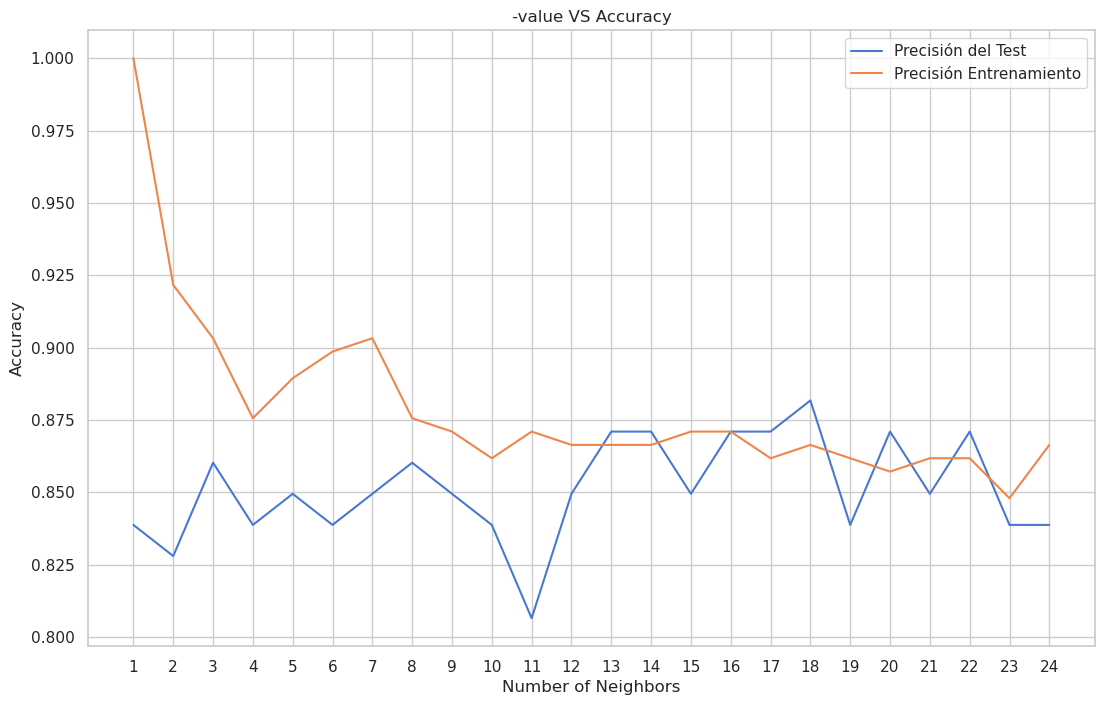

La mejor precisión es 0.8817204301075269 con K = 18


In [12]:
# Complejidad del modelo
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Recorrer diferentes valores de k
for i, k in enumerate(neig):
    # k del 1 al 25(excluir)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #entrenar la precisión
    train_accuracy.append(knn.score(x_train, y_train))
    # precisión de test
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Precisión del Test')
plt.plot(neig, train_accuracy, label = 'Precisión Entrenamiento')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("La mejor precisión es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## Hagamos un validación cruzada con GridSearch 
En el método KNN utilizamos la división de prueba de entrenamiento con estado_aleatorio que se divide exactamente igual en cada momento. Sin embargo, si no utilizamos random_state, los datos se dividen de forma diferente en cada momento y, según la precisión de la división, será diferente. Por lo tanto, podemos concluir que el rendimiento del modelo depende de train_test_split. Por ejemplo, divide, ajusta y predice datos 5 veces y las precisiones son 0,89, 0,9, 0,91, 0,92 y 0,93, respectivamente. ¿Qué precisión utilizas? ¿Sabes cuál será la precisión en el sexto tiempo, divide, entrena y predice? La respuesta es no lo sé, pero si uso la validación cruzada puedo encontrar una precisión aceptable.

In [13]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Hiperparámetro ajustado k: {}".format(knn_cv.best_params_)) 
print("Mejor score: {}".format(knn_cv.best_score_))

Hiperparámetro ajustado k: {'n_neighbors': 6}
Mejor score: 0.8225806451612904


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_dist = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, random_state=45)  # 10 iterations
knn_cv.fit(x, y)

# Print the best hyperparameter and the best score
print("Hiperparámetro ajustado k:", knn_cv.best_params_)
print("Mejor score:", knn_cv.best_score_)

Hiperparámetro ajustado k: {'n_neighbors': 6}
Mejor score: 0.8225806451612904


## Prediccion con Neural Network

Descripcion de la red neuronal:

* **Capa de entrada**: 6 neuronas, una para cada característica de entrada. Función de activación `Softmax`.
* **Optimizador**: `Adam` con un Learning rate de `0.0007`.
* **Bias**: Cada neurona utiliza el bias por defecto.
* **Capa de Salida**: 2 neuronas, una para cada clase.
* **Objetivo**: La columna "class" es la columna objetivo.
* **Distribución del set de datos**: El set de datos ha sido dividido, utilizando 80% para el entrenamiento y el 20% para el testeo.

![Descripción de la red neuronal](ML.png)

## Carga de datos para ML

En este punto, utilizaremos todos los datos para analizar la precisión del modelo.

In [15]:
import tensorflow as tf
from tensorflow import keras
def load_saved_model(model_name):
    model_path = f"models/{model_name}"
    model = keras.models.load_model(model_path)
    print(f'Model loaded from {model_path}')
    return model

model_name = 'trained_model-08.keras'
model = load_saved_model(model_name)
testing_data = data.iloc[:, :5]
testing_labels = data.iloc[:, 6].map({"Normal": 1, "Abnormal": 0})
testing_labels.head(1)
test_loss, test_acc = model.evaluate(testing_data, testing_labels, verbose=2)
print('\nTest accuracy:', test_acc)

2024-04-29 00:13:44.872828: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 00:13:44.895180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 00:13:45.328979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-29 00:13:45.606021: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Model loaded from models/trained_model-08.keras


2024-04-29 00:13:45.984532: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1714371226.122904 1393547 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 - 0s - 42ms/step - accuracy: 0.7097 - loss: 0.6931

Test accuracy: 0.7096773982048035


## ML Analisis

Veamos en detalle la precisión del modelo. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

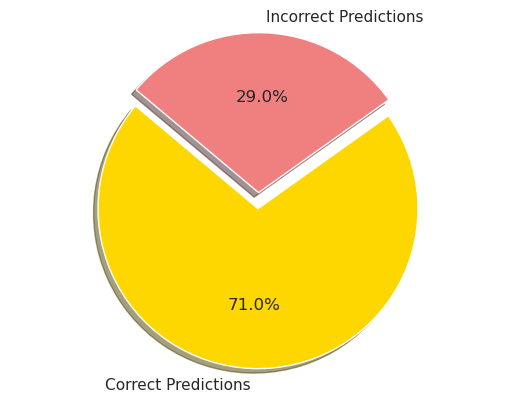

In [21]:
# Make a cake chart that shows the amount of correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0
for i in range(len(testing_data)):
    prediction = model.predict(testing_data[i:i+1])
    if prediction[0][0] > prediction[0][1] and testing_labels[i] == 0:
        correct_predictions += 1
    elif prediction[0][0] < prediction[0][1] and testing_labels[i] == 1:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

labels = 'Correct Predictions', 'Incorrect Predictions'
sizes = [correct_predictions, incorrect_predictions]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


## Conclusiones
Debido al tamaño del dataset, el uso de una red neuronal no presenta una gran ventaja y puede ser poco preciso en comparación a otros métodos de clasificación. 